# *Sampling*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
wnba = pd.read_csv('wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [2]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

### Simple Random Sampling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')
population_mean = wnba['PTS'].mean()
sample_means = []

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state = i)
    sample_means.append(sample.mean())

plt.scatter(range(1, 101), sample_means)
plt.axhline(population_mean)
plt.show()

<Figure size 640x480 with 1 Axes>

### Sampling Error

In [4]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')

parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic

sampling_error

2

### Stratified Sampling

In [5]:
wnba['PTG'] = wnba['PTS']/wnba['Games Played']
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,PTG
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0,11.625000
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0,7.233333
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0,8.384615
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0,6.064516
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0,2.083333


In [6]:
wnba_pos = {}
points_per_pos = {}

unique_positions = [i for i in wnba['Pos'].unique()]

for i in unique_positions:
    wnba_pos[i] = wnba[wnba['Pos'] == i]

for k, v in wnba_pos.items():
    sample = v['PTG'].sample(10, random_state = 0)
    points_per_pos[k] = sample.mean()
    
points_per_pos

{'F': 8.702175158545568,
 'G/F': 6.817264935760487,
 'G': 7.092926195632343,
 'C': 9.833761394334251,
 'F/C': 9.059118773946361}

In [7]:
position_most_points = max(points_per_pos, key = points_per_pos.get)
position_most_points

'C'

### Proportional Stratified Sampling

In [8]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


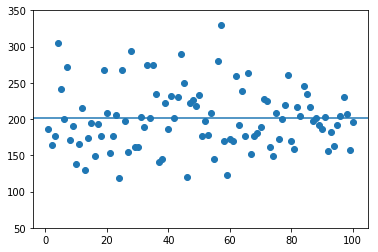

In [9]:
import matplotlib.pyplot as plt

games_under_12 = wnba[wnba['Games Played'] <= 12]
games_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
games_above_22 = wnba[wnba['Games Played'] > 22]

proportional_mean = []
    
for i in range(100):
    sample_one = games_under_12.sample(1, random_state = i)
    sample_two = games_13_22.sample(2, random_state = i)
    sample_seven = games_above_22.sample(7, random_state = i)
    
    final_sample = pd.concat([sample_one,
                              sample_two,
                              sample_seven])
    proportional_mean.append(final_sample['PTS'].mean())
    
plt.scatter(range(1, 101), proportional_mean)
plt.yticks([50, 100, 150, 200, 250, 300, 350])
plt.axhline(wnba['PTS'].mean())
plt.show()

### Choosing the Right Strata

In [10]:
print(wnba['MIN'].value_counts(bins = 3, normalize = True) * 100)

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64


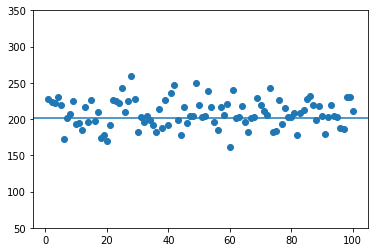

In [11]:
played_under_347 = wnba[wnba['MIN'] <= 347]
played_348_683 = wnba[(wnba['MIN'] > 347) & (wnba['MIN'] <= 683)]
played_above_683 = wnba[wnba['MIN'] > 683]

proportional_mean = []
    
for i in range(100):
    sample_one = played_under_347.sample(4, random_state = i)
    sample_two = played_348_683.sample(4, random_state = i)
    sample_seven = played_above_683.sample(4, random_state = i)
    
    final_sample = pd.concat([sample_one,
                              sample_two,
                              sample_seven])
#     print(final_sample['MIN'].head())
    proportional_mean.append(final_sample['PTS'].mean())
    
plt.scatter(range(1, 101), proportional_mean)
plt.yticks([50, 100, 150, 200, 250, 300, 350])
plt.axhline(wnba['PTS'].mean())
plt.show()

### Cluster Sampling

In [12]:
unique_teams = wnba['Team'].unique()
team_clusters = {}

for i in unique_teams:
    team_clusters[i] = wnba[wnba['Team'] == i]

random_clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)
random_list = []

for i in random_clusters:
    random_list.append(team_clusters[i])

final_df = pd.concat(random_list)

sampling_error_height = wnba['Height'].mean() - final_df['Height'].mean()
sampling_error_age = wnba['Age'].mean() - final_df['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - final_df['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - final_df['PTS'].mean()

print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934


# *Frequency Distributions*

### Frequency Distribution Tables

In [13]:
wnba = pd.read_csv('wnba.csv')
freq_distro_pos = wnba['Pos'].value_counts()
freq_distro_height = wnba['Height'].value_counts()

print(freq_distro_height)
freq_distro_pos

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64


G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

### Sorting Frequency Distribution Tables

In [14]:
wnba = pd.read_csv('wnba.csv')

freq_age = wnba['Age'].value_counts()

age_ascending = freq_age.sort_index()
age_descending = freq_age.sort_index(ascending = False)

print(age_ascending)
age_descending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64


36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

###  Sorting Tables for Ordinal Variables

In [15]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

# Type your answer below
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

pts_ordinal_desc

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

### Proportions and Percentages

In [16]:
wnba = pd.read_csv('wnba.csv')
Age_proportion = wnba['Age'].value_counts(normalize=True)
Age_percetage = wnba['Age'].value_counts(normalize=True)*100
proportion_25 = Age_proportion[25]
percentage_30 = Age_percetage[30]
percentage_over_30 = Age_percetage[Age_percetage.index >= 30].sum()
percentage_below_23 = Age_percetage[Age_percetage.index <= 23].sum()

print(proportion_25)
print(percentage_30)
print(percentage_over_30)
percentage_below_23

0.1048951048951049
6.293706293706294
26.573426573426573


18.881118881118883

### Percentiles and Percentile Ranks

In [17]:
# Finding Percentile for games played (Total Games = 34)
wnba = pd.read_csv('wnba.csv')

from scipy.stats import percentileofscore
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 
                                              17, 
                                              kind = 'weak')

percentage_half_more = (100 - percentile_rank_half_less)
print(percentile_rank_half_less)
percentage_half_more

16.083916083916083


83.91608391608392

### Finding Percnetiles with Pandas

In [18]:
age_describe = wnba['Age'].describe(percentiles=[0.5, 0.75, 0.95]).iloc[3:]

age_upper_quartile = age_describe['75%']
age_middle_quartile = age_describe['50%']
age_95th_percentile = age_describe['95%']

print(age_upper_quartile)
print(age_middle_quartile)
print(age_95th_percentile)

age_describe

30.0
27.0
34.0


min    21.0
50%    27.0
75%    30.0
95%    34.0
max    36.0
Name: Age, dtype: float64

### Grouped Frequency Distribution Tables

In [19]:
grouped_freq_table = wnba['PTS'].value_counts(bins=10, normalize=True).sort_index(ascending=False)*100
grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

### Readability for Grouped Frequency Tables

In [20]:
intervals = pd.interval_range(start=0, end=600, freq=60)
print(len(intervals))

gr_freq_table_10 = pd.Series([0 for i in range(len(intervals))], index=intervals)

for value in wnba['PTS']:
    for i in intervals:
        if value in i:
            gr_freq_table_10.loc[i] += 1
            break
            
gr_freq_table_10

10


(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

# *Visualizing Frequency Distributions*

### Bar Plots

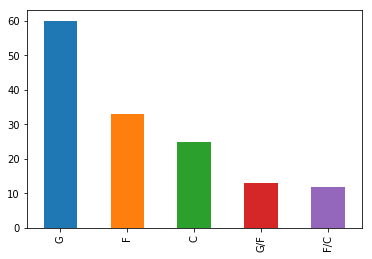

In [21]:
import matplotlib.pyplot as plt
wnba['Pos'].value_counts().plot.bar()
plt.show()

In [22]:
def make_exp_ordinal(row):
    exp_list = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran']
    if row['Experience'] == 'R':
        return exp_list[0]
    if (1 <= int(row['Experience']) <=  3):
        return exp_list[1]
    if (4 <= int(row['Experience']) <=  5):
        return exp_list[2]
    if (5 <= int(row['Experience']) <=  10):
        return exp_list[3]
    else:
        return exp_list[4]
    
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

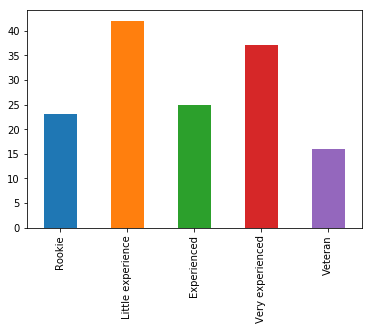

In [23]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()
plt.show()

### Horizontal Bar Plot

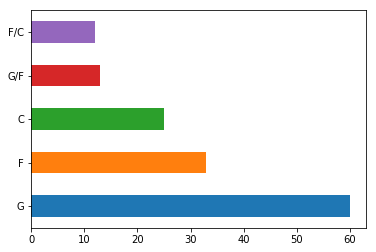

In [24]:
wnba['Pos'].value_counts().plot.barh()
plt.show()

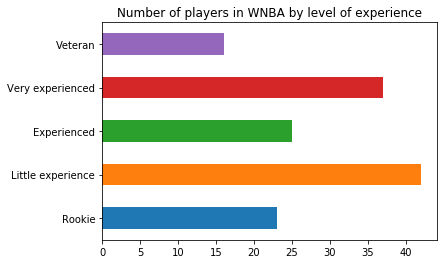

In [25]:
wnba['Exp_ordinal'].value_counts().iloc[[
    3, 0, 2, 1, 4]].plot.barh(title = "Number of players in WNBA by level of experience")
plt.show()

### Pie Chart

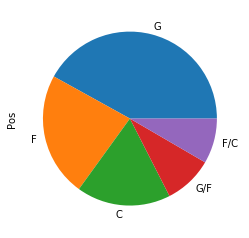

In [26]:
# print(wnba['Pos'].value_counts(normalize=True))
wnba['Pos'].value_counts().plot.pie()
plt.show()

### Customizing Pie Chart

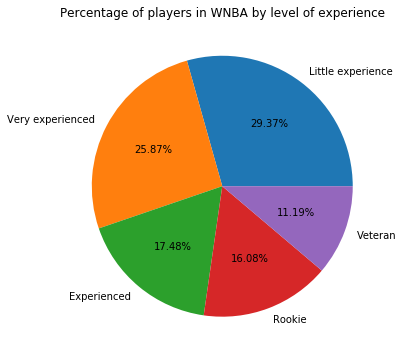

In [27]:
wnba['Exp_ordinal'].value_counts().plot.pie(title='Percentage of players in WNBA by level of experience', 
                                           autopct='%.2f%%',
                                           figsize=(6, 6))
plt.ylabel('')
plt.show()

### Histograms

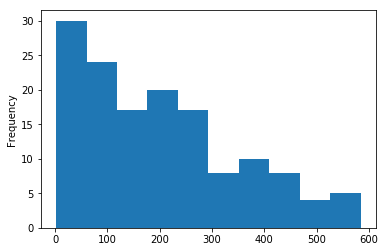

In [28]:
wnba['PTS'].plot.hist()
plt.show()

**Understanding Working of a histogram**<br>
Histograms generate a grouped frequency distribution table for the given variable with ten class intervals.<br>
For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

In [29]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


In [30]:
wnba['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

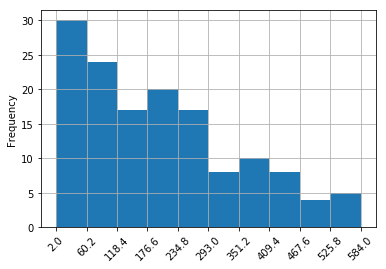

In [31]:
from numpy import arange
wnba['PTS'].plot.hist(xticks = arange(2, 585, 58.2), grid=True, rot=45)
plt.show()

In [32]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

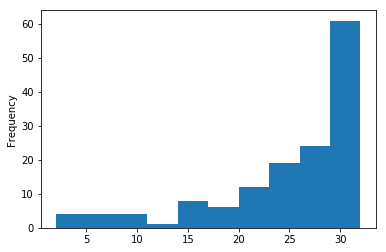

In [33]:
wnba['Games Played'].plot.hist()
plt.show()

### Binning for Histograms

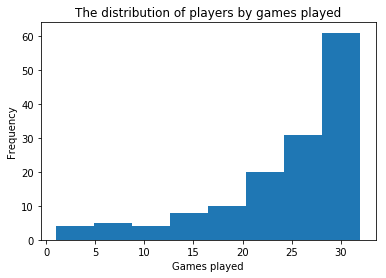

In [34]:
wnba['Games Played'].plot.hist(range = (1, 32), bins=8, title="The distribution of players by games played")
plt.xlabel('Games played')
plt.show()

**Left (negatively) Skewed Distribution**

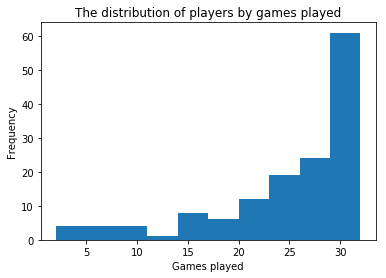

In [35]:
wnba['Games Played'].plot.hist(title="The distribution of players by games played")
plt.xlabel('Games played')
plt.show()

**Right (positively) Skewed Distribution**

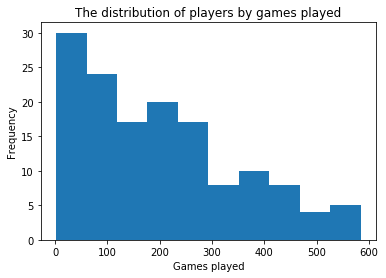

In [36]:
wnba['PTS'].plot.hist(title="The distribution of players by games played")
plt.xlabel('Games played')
plt.show()

# *Comparing Frequency Distributions*

In [37]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print('rookie_distro')
print(rookie_distro)

print('\nlittle_xp_distro')
print(little_xp_distro)

print('\nexperienced_distro')
print(experienced_distro)

print('\nvery_xp_distro')
print(very_xp_distro)

print('\nveteran_distro')
print(veteran_distro)

rookie_distro
G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64

little_xp_distro
G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64

experienced_distro
G      9
F      6
C      6
G/F    2
F/C    2
Name: Pos, dtype: int64

very_xp_distro
G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64

veteran_distro
G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


### Grouped Bar Plots

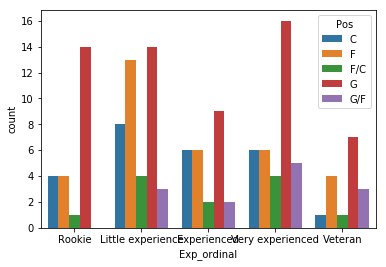

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exp_ordinal', 
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'], 
              hue='Pos', hue_order = ['C', 'F', 'F/C', 'G', 'G/F'], data=wnba)
plt.show()

### Do older players play less?

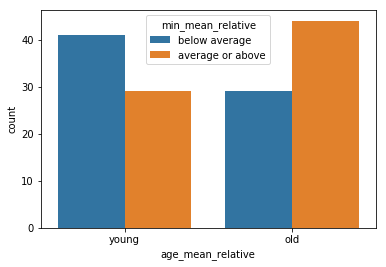

In [39]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')
sns.countplot(x='age_mean_relative', hue='min_mean_relative', 
              data=wnba)
plt.show()

### Comparing Histograms

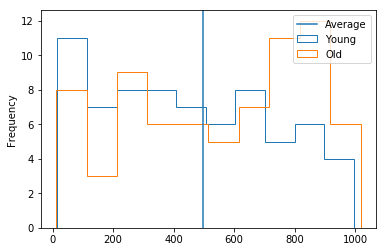

In [40]:
import matplotlib.pyplot as plt
wnba[wnba['Age'] < 27]['MIN'].plot.hist(histtype='step', label='Young')
wnba[wnba['Age'] >= 27]['MIN'].plot.hist(histtype='step', label='Old')
plt.axvline(x = 497, label='Average')
plt.legend()
plt.show()

### Kernel Density Estimate Plots

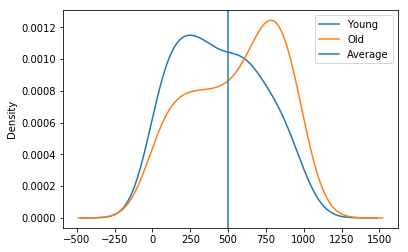

In [41]:
wnba[wnba['Age'] < 27]['MIN'].plot.kde(label='Young')
wnba[wnba['Age'] >= 27]['MIN'].plot.kde(label='Old')
plt.axvline(x=497, label='Average')
plt.legend()
plt.show()

### Strip Plots

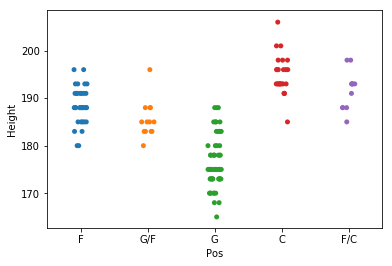

In [45]:
sns.stripplot(x='Pos', y='Height', data=wnba)
plt.show()

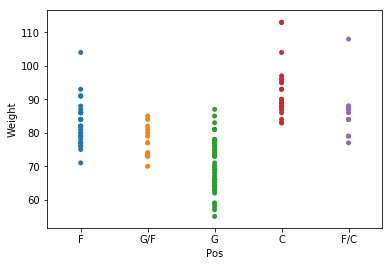

In [46]:
sns.stripplot(x='Pos', y='Weight', data=wnba, jitter=False)
plt.show()

### Box Plots

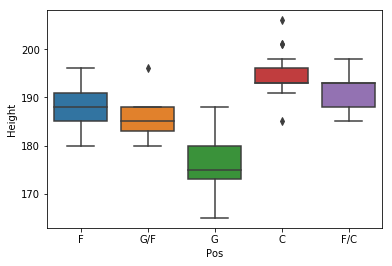

In [47]:
sns.boxplot(x='Pos', y='Height', data=wnba)
plt.show()

### Outliers
A value is an outlier if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).


In [57]:
gamesp_info = wnba['Games Played'].describe()
gamesp_info

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

In [72]:
iqr = gamesp_info['75%'] - gamesp_info['25%']
lower_bound = gamesp_info['25%'] - (1.5*iqr)
upper_bound = gamesp_info['75%'] + (1.5*iqr)

print('iqr', iqr)
print('lower_bound', lower_bound)
print('upper_bound', upper_bound)

outliers_low_series = wnba[wnba['Games Played'] < lower_bound]['Games Played']
outliers_low = len(outliers_low_series)

outliers_high_series = wnba[wnba['Games Played'] > upper_bound]['Games Played']
outliers_high = len(outliers_high_series) 

print('\noutliers_low_series')
print(outliers_low_series, '\n')
print('outliers_high_series')
print(outliers_high_series, '\n')

print('outliers_low', outliers_low)
print('outliers_high', outliers_high)

iqr 7.0
lower_bound 11.5
upper_bound 39.5

outliers_low_series
0       8
9       7
14      4
17      5
24      2
35      7
56      4
64     10
65     10
84      7
90      9
115     4
Name: Games Played, dtype: int64 

outliers_high_series
Series([], Name: Games Played, dtype: int64) 

outliers_low 12
outliers_high 0


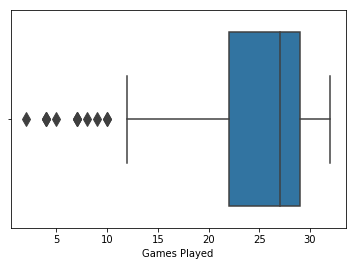

In [75]:
sns.boxplot(wnba['Games Played'], fliersize=10)
plt.show()

In [ ]:
distribution = [0,2,3,3,3,4,13]

import numpy as np

distribution_np = np.array(distribution)
mean = distribution_np.mean()
mean

In [ ]:
less = [abs(i-mean) for i in distribution if (i < mean)]
np.sum(less)
# less

In [ ]:
more = [abs(i-mean) for i in distribution if (i > mean)]
np.sum(more)
more

In [ ]:
from numpy.random import randint
distribution = randint(1000, size=10)
distribution.mean()

In [ ]:
import numpy as np
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    np.random.seed(i)
    distribution = randint(1000, size=10)
    mean = distribution.mean()
    sum_below = round(np.array([abs(i-mean) for i in distribution if (i < mean)]).sum(), 1)
    sum_above = round(np.array([abs(i-mean) for i in distribution if (i > mean)]).sum(), 1)
#     print(sum_below)
#     print(sum_above)
    equal_distances += 1
    
        
print(equal_distances)

In [ ]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

def cal_mean(d):
    N = len(d)
    sum_of_d = 0
    
    for k in  d:
        sum_of_d += k
    return sum_of_d/N
    
print(cal_mean(distribution_1))
print(cal_mean(distribution_2))
print(cal_mean(distribution_3))

In [ ]:
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')

pop_mean = houses['SalePrice'].mean()
sample_size = 5

sampling_errors = []

for i in range(101):
    Sample = houses['SalePrice'].sample(sample_size, random_state = i)
    sample_size += 29
    sam_mean = Sample.mean()
    sampling_error = pop_mean - sam_mean
    sampling_errors.append(sampling_error)
    
plt.scatter([x for x in range(5, 2931, 29)], sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel("Sample Size")
plt.ylabel("Sampling error")

In [ ]:
from numpy import arange

pop_mean = houses['SalePrice'].mean()
sample_means = []

for i in range(10000):
    Sample = houses['SalePrice'].sample(100, random_state = i)
    sam_mean = Sample.mean()
    sample_means.append(sam_mean)
    
plt.hist(sample_means)
plt.axvline(pop_mean)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.xlim(0, 500000)
plt.show()

In [ ]:
population = [3, 7, 2]
pop_df = pd.DataFrame(population)
for i in range(6):
    Sample = pop_df.sample(2, random_state=i)
    print(Sample)